# Upper envelope

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Next-period functions](#toc2_)    
- 3. [EGM](#toc3_)    
- 4. [Upper envelope](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

This notebook shows how to use the **upperenvelope** module from the **consav** package.

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [1]:
import numpy as np
from numba import njit

import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

Choose parameters and create grids:

In [2]:
# a. preferences and return
beta = 0.96
sigma = 2
r = 0.02

# b. end-of-period assets (exogenous grid)
Na = 1000
a_max = 8

# c. next-period functions
eta = 0.15
m_ubar = 5

# d. grid
grid_a = np.linspace(0,a_max,Na)

## 2. <a id='toc2_'></a>[Next-period functions](#toc0_)

Calculate the next-period consumption and value functions:

In [3]:
m_plus = (1+r)*grid_a + 1
I = m_plus >= m_ubar
    
# a. value function
vbeg_plus = np.sqrt(m_plus) 
vbeg_plus[I] += eta*(m_plus[I]-m_ubar)
                                                                                                          
# b. derivative
vbeg_a_plus = 0.5*(1+r)*m_plus**(-0.5) 
vbeg_a_plus[I] += (1+r)*eta 

Plot them to see the jump in consumption and the kink in the value function.

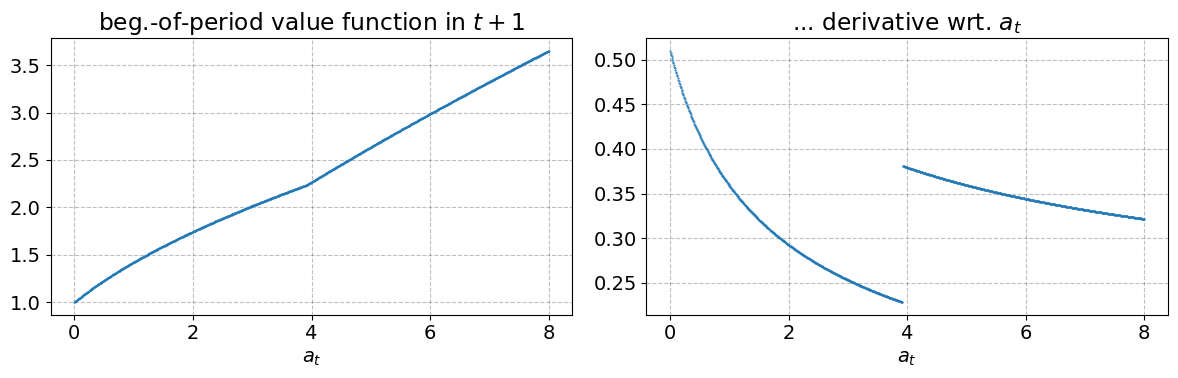

In [4]:
# a. beginning-of-period value
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1,2,1)
ax.plot(grid_a,vbeg_plus,'o',ms=0.5)
ax.set_title('beg.-of-period value function in $t+1$')
ax.set_xlabel('$a_t$')

ax = fig.add_subplot(1,2,2)
ax.plot(grid_a,vbeg_a_plus,'o',ms=0.5)
ax.set_title('... derivative wrt. $a_{t}$')
ax.set_xlabel('$a_t}$')

fig.tight_layout()
fig.savefig('figs/upper_envelope_next_period.pdf')

## 3. <a id='toc3_'></a>[EGM](#toc0_)

In [5]:
from consav import linear_interp # linear interpolation

Apply the EGM algorithm.

In [6]:
w_vec = beta*vbeg_plus 
c_vec = (beta*vbeg_a_plus)**(-1.0/sigma)
m_vec = grid_a + c_vec                            
v_vec = c_vec**(1-sigma)/(1-sigma) + w_vec

Plot the result of the EGM algorithm to see that the its does not define a consumption function.

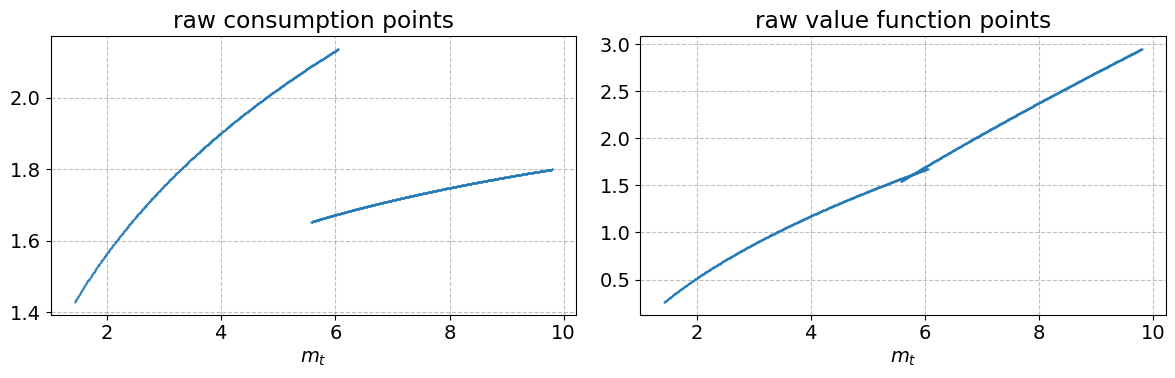

In [11]:
# a. raw consumption function
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1,2,1)
ax.plot(m_vec,c_vec,'o',ms=0.5)
ax.set_title('raw consumption points')
ax.set_xlabel('$m_t$')

# b. raw value function
ax = fig.add_subplot(1,2,2)

ax.plot(m_vec,v_vec,'o',ms=0.5)
ax.set_title('raw value function points')
ax.set_xlabel('$m_t$')

fig.tight_layout()
fig.savefig('figs/upper_envelope_raw.pdf')

## 4. <a id='toc4_'></a>[Upper envelope](#toc0_)

In [8]:
from consav import upperenvelope

# a. create
@njit
def u(c,sigma):
    return c**(1-sigma)/(1-sigma)

myupperenvelope = upperenvelope.create(u) # where is the utility function

# b. apply
grid_m = (1+r)*grid_a + 1 # grid for m
c_ast_vec = np.empty(grid_m.size) # output
v_ast_vec = np.empty(grid_m.size) # output

myupperenvelope(grid_a,m_vec,c_vec,w_vec,grid_m,c_ast_vec,v_ast_vec,sigma)

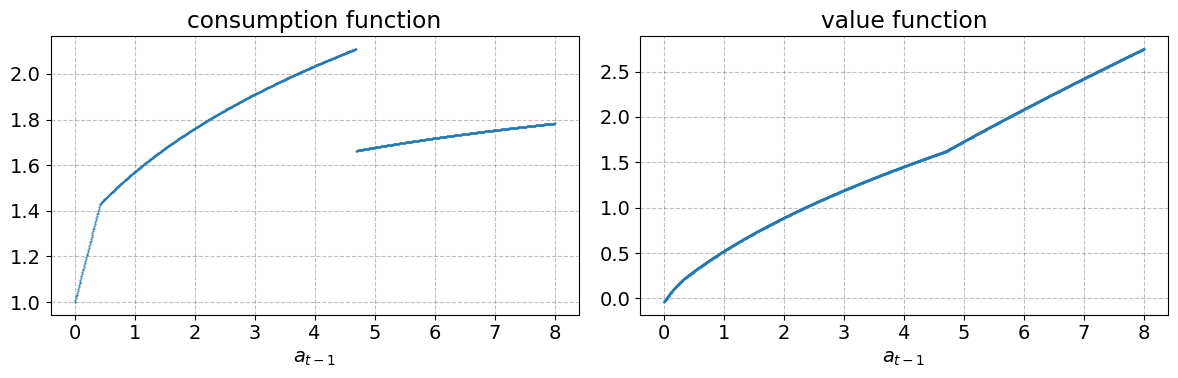

In [13]:
# a. consumption function
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1,2,1)
ax.plot(grid_a,c_ast_vec,'o',ms=0.5)
ax.set_title('consumption function')
ax.set_xlabel('$a_{t-1}$')

# b. value function
ax = fig.add_subplot(1,2,2)
ax.plot(grid_a,v_ast_vec,'-o',ms=0.5)
ax.set_title('value function')
ax.set_xlabel('$a_{t-1}$')

fig.tight_layout()
fig.savefig('figs/upper_envelope.pdf')